> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [The Movie Database (TMDB)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> The Movie Database (TMDB) is a dataset that contains vivid details of a lot of movies providing information on certain characteristics of movies like their rating, budget, revenue, author, crew, popularity, movie_id, genres, movie_titles, tagline, cast and others. 


### Question(s) for Analysis
>**These are very few question(s) I will use for my analysis of the dataset*
### Does the popularity of a movie brings more revenue? Which movie popularity produced a higher revenue?

### Which movies had a lot of budget but ended up producing lower revenue. Does budget really affect the revenue?

### Which genres are most popular from year to year? What kind of properties are associated with movies with high revenues?

### How many movies were produced in a particular year or how many movies are produced in some years

### Does a movie runtime have an effect on the ratings

### What is the average runtime of a movie

### Can we find the number of movies produced by a particular actor

### Can we also find out the different movies produced by a director and see the different in revenues. Can we tell what contributed to the difference?

> **NB:**: There are some columns in our dataset that will not be relevant for the analysis.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0
#!pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [4]:
#using pandas to read the tmdb dataset
df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From the summary statistics we realized
#### I realized majority of the columns are complete with exception of `imdb_id`, `cast`, `homepage`, `director`, `tagline`, `keywords`, `overview`, `genres` and `production companies` which have got null values.

#### I can also observe that in terms of the popularity, the one with the highest popularity has not got a very huge figure. from the dataset it's 33(approx.) which is not even a half of a percent and this ranges from 20% to 71% of the population.

#### I can also see from the dataset that some movies used a very big buget and at the end of the analysis, i want to find out if it had a toll on their revenue. 

#### Certain columns, like `cast` and `genres`, contain multiple values separated by `pipe (|)` characters.

#### There are some odd characters in the `cast` column.

#### The final two columns endingwith `_adj` show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time

#### I also realized majority of the dataset i.e almost half of the dataset had no revenue and it's makes the dataset sort of wierd. Because from the figure type `len(df.query('revenue == 0'))` gives you a value `6016` which is half of the dataset. it's wierd.

#### I also realized majority of the dataset i.e almost half of the dataset had no budget and it's makes the dataset sort of wierd. Because from the figure type `len(df.query('budget == 0'))` gives you a value `5696` which is half of the dataset. it's wierd and tries to help me find out if the budget really affect the revenue. And also how can a movie production or sort of not have any budget

In [5]:
#Getting a simplified description of the dataset i.e. summary statistics of the whole dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df['budget'].head()

0    150000000
1    150000000
2    110000000
3    200000000
4    190000000
Name: budget, dtype: int64

In [7]:
df['cast'].head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

In [8]:
#This gives the number of columns and rows in the dataset
df.shape

(10866, 21)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [10]:
#This prints the names of the columns
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [11]:
#This gives the number of null values in each columns
#From the results below, we realize that the homepage column has the highest number of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
df.isnull().sum().max() #Finding the highest number of null values

7930

In [13]:
len(df.query('revenue == 0')) #finding the total number of movies with 0 revenue

6016

From the below visualization of the entire dataset we can conclude that
##### Most of them didn't have or presented 0 budget
##### Most of the movies have not got popularity
##### Most of the movies have not got revenues
##### Most of the people didnot vote

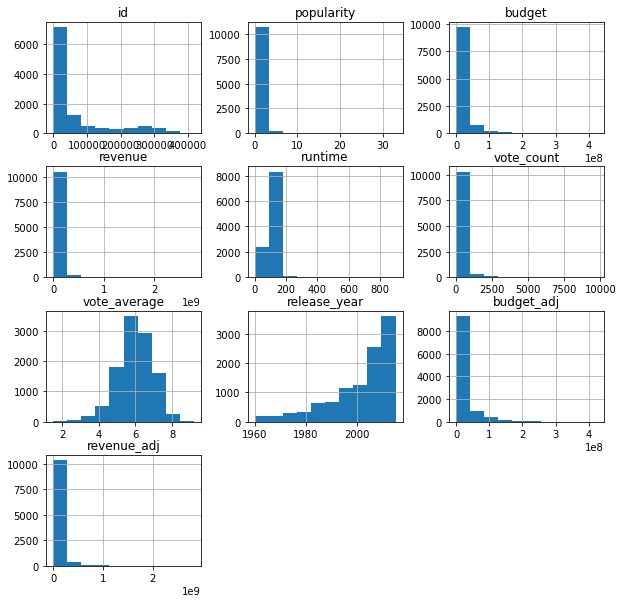

In [14]:
#Getting a visualiztion of the entire dataframe
df.hist(figsize=(10,10));

In [15]:
# Install the package below, if not already
#!pip install nbconvert
#jupyter nbconvert notebook.ipynb --to slides --post serve

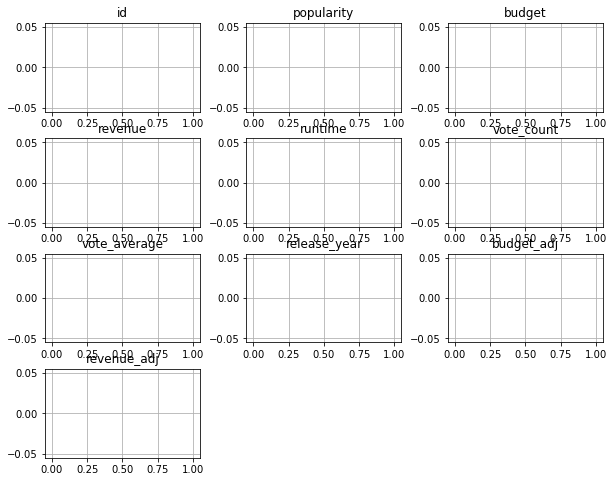

In [16]:
#A visualization about revenue on the entire dataset
df[df.revenue.isnull()].hist(figsize=(10,8));

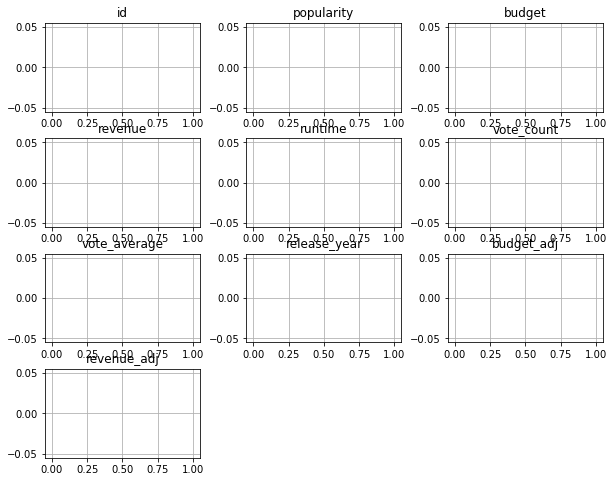

In [17]:
#A visualization of the budget on the entire dataset
df[df.budget.isnull()].hist(figsize=(10,8));

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Text(0.5, 1.0, 'Null Values in the Revenue Column')

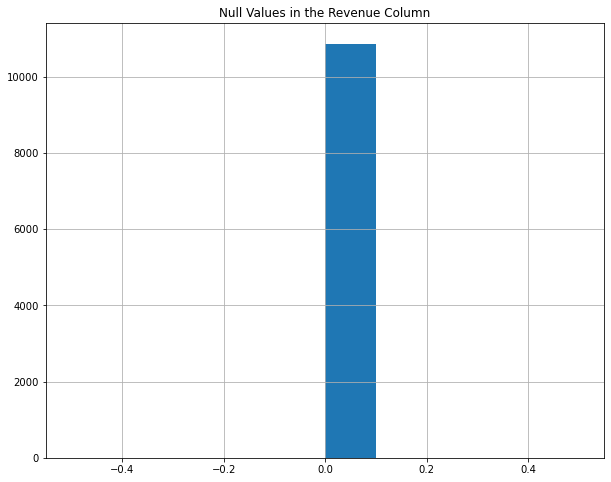

In [21]:
#A visualization of the null values in a graph of the revenue column
df.revenue.isnull().hist(figsize=(10,8));
plt.title('Null Values in the Revenue Column')

Text(0.5, 1.0, 'Null Values in the Budget Column')

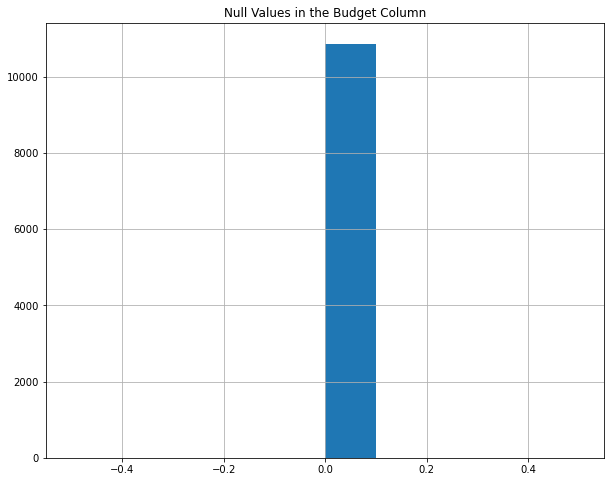

In [22]:
#A visualization of the null values in a graph of the budget column
df.budget.isnull().hist(figsize=(10,8));
plt.title('Null Values in the Budget Column')

In [23]:
df[df.revenue == 0]  #Giving details of the movies with 0 revenue

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.0


In [24]:
len(df.query('budget == 0'))  #Gives the number of movies with 0 budget

5696

In [25]:
#indicating the data types of each column of the dataset
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

- This is a Univariate Data Distribution of the Budget Column

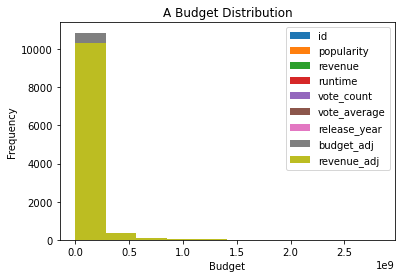

In [28]:
df.plot(x='budget' , kind='hist');
plt.title('A Budget Distribution');
plt.xlabel('Budget');

- This is a Univariate Data Distribution of the Revenue Column

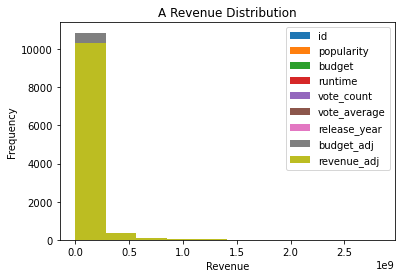

In [29]:
df.plot(x='revenue' , kind='hist');
plt.title('A Revenue Distribution');
plt.xlabel('Revenue');


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

### After discussing the structure of the data and any problems that need to be
###   cleaned, perform those cleaning steps in the second part of this section.

In [30]:
#First of all we want to drop all columns which will not be needed in our analysis and dealing
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [31]:
 df = df.set_index('id') #Making the id column as the index 

In [32]:
df.head(2)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [33]:
#Am making a duplication of the dataset before dropping some columns
original_df = df.copy()

In [34]:
df.drop(['overview', 'release_date', 'keywords', 'tagline', 'runtime', 'imdb_id', 'homepage', 'production_companies', 'original_title', 'vote_count', 'vote_average'], axis=1, inplace=True)

In [35]:
#The number of columns and rows of the new dataset
df.shape 

(10866, 9)

In [36]:
#Now let's replace all null values with their mean values
df.fillna(df.mean(), inplace=True)

C:\Users\ODBC\AppData\Local\Temp\ipykernel_2844\3986325122.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   cast          10790 non-null  object 
 4   director      10822 non-null  object 
 5   genres        10843 non-null  object 
 6   release_year  10866 non-null  int64  
 7   budget_adj    10866 non-null  float64
 8   revenue_adj   10866 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 848.9+ KB


In [38]:
df[df.cast.isnull()]

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
345637,0.422901,0,0,NaN,Sanjay Patel,Animation,2015,0.000000,0.0
355020,0.220751,0,0,NaN,Evgeny Afineevsky,Documentary,2015,0.000000,0.0
321109,0.201696,0,0,NaN,Adam Curtis,Documentary,2015,0.000000,0.0
333350,0.122543,0,0,NaN,David Gelb,Documentary,2015,0.000000,0.0
224972,0.114264,0,0,NaN,Jennifer Siebel Newsom,Documentary,2015,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
13926,0.253376,0,0,NaN,John Lasseter,Animation,1987,0.000000,0.0
48714,0.046272,0,0,NaN,Martin Scorsese,Drama,1968,0.000000,0.0
48784,0.146906,200,0,NaN,David Lynch,Animation,1967,1307.352748,0.0


In [39]:
df1 = df.copy()
df1

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000,2068178225,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000,1506249360,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...
21,0.080598,0,0,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Documentary,1966,0.000000e+00,0.000000e+00
20379,0.065543,0,0,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Action|Adventure|Drama,1966,0.000000e+00,0.000000e+00
39768,0.065141,0,0,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Mystery|Comedy,1966,0.000000e+00,0.000000e+00


In [40]:
#Dropping all null rows
df1.dropna(inplace=True)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 135397 to 22293
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10732 non-null  float64
 1   budget        10732 non-null  int64  
 2   revenue       10732 non-null  int64  
 3   cast          10732 non-null  object 
 4   director      10732 non-null  object 
 5   genres        10732 non-null  object 
 6   release_year  10732 non-null  int64  
 7   budget_adj    10732 non-null  float64
 8   revenue_adj   10732 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 838.4+ KB


In [42]:
df1.head(3)

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,150000000,1513528810,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08


In [43]:
df1.cast.nunique()

10665

In [44]:
df1.describe()

,popularity,budget,revenue,release_year,budget_adj,revenue_adj
count,10732.000000,1.073200e+04,1.073200e+04,10732.000000,1.073200e+04,1.073200e+04
mean,0.652609,1.480506e+07,4.031622e+07,2001.260436,1.776644e+07,5.200147e+07
std,1.004757,3.106345e+07,1.176476e+08,12.819831,3.446490e+07,1.454192e+08
min,0.000188,0.000000e+00,0.000000e+00,1960.000000,0.000000e+00,0.000000e+00
25%,0.210766,0.000000e+00,0.000000e+00,1995.000000,0.000000e+00,0.000000e+00
50%,0.387135,0.000000e+00,0.000000e+00,2006.000000,0.000000e+00,0.000000e+00
75%,0.720621,1.600000e+07,2.500000e+07,2011.000000,2.111556e+07,3.470526e+07
max,32.985763,4.250000e+08,2.781506e+09,2015.000000,4.250000e+08,2.827124e+09


In [45]:
len(df1.query('revenue==0'))

5888

In [46]:
df1.query('revenue == 0')

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
265208,2.932340,30000000,0,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,Thriller|Crime|Drama,2015,2.759999e+07,0.0
334074,2.331636,20000000,0,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,Crime|Thriller|Action,2015,1.839999e+07,0.0
347096,2.165433,0,0,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,Action|Adventure|Fantasy,2015,0.000000e+00,0.0
308369,2.141506,0,0,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,Comedy|Drama,2015,0.000000e+00,0.0
370687,1.876037,0,0,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,Fantasy|Action|Adventure,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...
21,0.080598,0,0,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,Documentary,1966,0.000000e+00,0.0
20379,0.065543,0,0,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Action|Adventure|Drama,1966,0.000000e+00,0.0
39768,0.065141,0,0,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,Mystery|Comedy,1966,0.000000e+00,0.0


In [47]:
#Before coming to work on the revenue, budget, revenue_adj and the budget_adj, I want to check if there's duplicated rows
df1.duplicated().sum()

1

In [48]:
#Dropping duplicated rows
df1.drop_duplicates(inplace=True)

In [49]:
#Back to checking the size of the dataset
df1.shape

(10731, 9)

In [50]:
len(df1.query('revenue_adj == 0'))

5888

In [51]:
#Trying to fill all values with 0 with the mean of the dataset of these columns: thus revenue, budget, revenue_adj, budget_adj
df2 = df1.copy()

In [52]:
df2.revenue.mean()

40319887.588016026

In [53]:
df2['budget'] = df2['budget'].replace(0, df2.budget.mean())

In [54]:
df2.query('budget == 0')

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,


In [55]:
df2.budget.head(3)

id
135397    150000000.0
76341     150000000.0
262500    110000000.0
Name: budget, dtype: float64

In [56]:
df2['revenue'] = df2['revenue'].replace(0, df2.revenue.mean())

In [57]:
df2.head()

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [109]:
df2['release_year'].value_counts()

2014    682
2013    649
2015    617
2012    574
2011    532
2009    525
2008    486
2010    475
2007    432
2006    404
2005    361
2004    307
2003    281
2002    264
2001    241
2000    224
1999    224
1998    210
1996    203
1997    191
1994    184
1993    177
1995    174
1988    142
1989    135
1991    133
1990    132
1992    132
1987    124
1986    120
1985    108
1984    104
1981     82
1982     81
1983     80
1980     78
1978     65
1979     57
1977     56
1973     55
1971     55
1976     47
1974     46
1966     46
1975     44
1964     42
1970     40
1972     40
1967     38
1968     38
1965     35
1963     34
1960     32
1962     32
1961     31
1969     30
Name: release_year, dtype: int64

In [58]:
df2.query('budget == 0') #Testing if the 0 have been filled with the mean of that column

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,


In [59]:
#zero_values = ['revenue', 'revenue_adj', 'budget', 'budget_adj']
#df2[zero_values] =df2[zero_values].replace(0, df2[zero_values].mean(), inplace=True)

In [60]:
df2['revenue_adj'] = df2['revenue_adj'].replace(0, df2.revenue_adj.mean())
df2['budget_adj'] = df2['budget_adj'].replace(0, df2.budget_adj.mean())

In [61]:
df2.head()

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


#### The below graph is different from the above graph

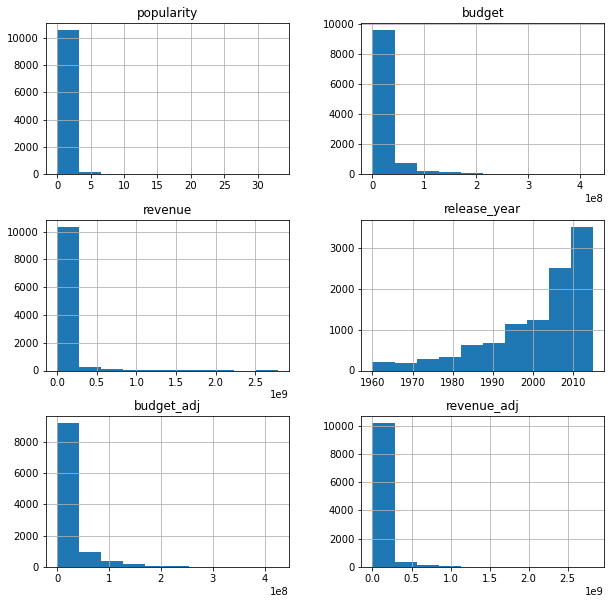

In [62]:
df2.hist(figsize=(10,10));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Does the popularity of a movie brings more revenue? Which movie popularity produced a higher revenue?)

In [63]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df2.popularity.describe()

count    10731.000000
mean         0.652615
std          1.004804
min          0.000188
25%          0.210765
50%          0.387081
75%          0.720889
max         32.985763
Name: popularity, dtype: float64

In [64]:
df2.popularity.nunique()

10684

> *FROM THE BELOW RESULT WE ARE SEEING THAT THE MOVIE WITH THE HIGHEST REVENUE HAVE A LOWER POPULARITY*

In [65]:
df2[df2.revenue == df2['revenue'].max()]

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
19995,9.432768,237000000.0,2.781506e+09,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action|Adventure|Fantasy|Science Fiction,2009,2.408869e+08,2.827124e+09


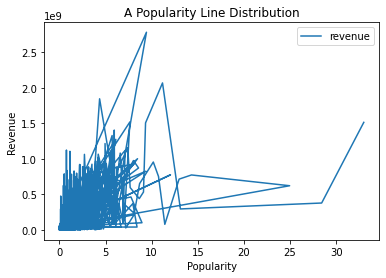

In [69]:
df2.plot(x="popularity", y='revenue')
plt.title('A Popularity Line Distribution');
plt.xlabel('Popularity');
plt.ylabel('Revenue');
plt.show()

In [70]:
#df2.plot(x="popularity", y='revenue', kind='bar')
#plt.show()

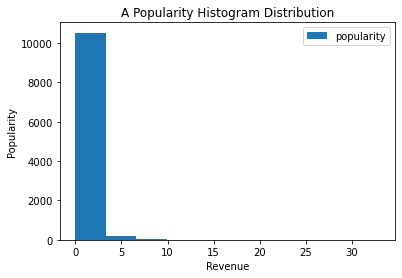

In [121]:
#From our visualization we can see that from the dataset, 
df2.plot(x="revenue", y='popularity', kind='hist')
plt.title('A Popularity Histogram Distribution');
plt.xlabel('Revenue');
plt.ylabel('Popularity');
plt.show()

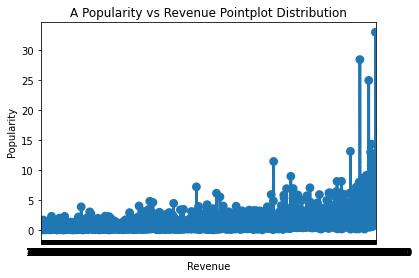

In [120]:
sns.pointplot(data=df2, x='revenue', y='popularity');
plt.title('A Popularity vs Revenue Pointplot Distribution');
plt.xlabel('Revenue');
plt.ylabel('Popularity');
plt.show()

In [74]:
#sns.pointplot(x="revenue", y="popularity", hue=['blue', 'red'], data=df2)

In [75]:
df2.query('popularity == 32.985763')

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09


### Research Question 2  
### (Which genres are most popular from year to year? What kind of properties are associated with movies with high revenues?)

In [76]:
df2.groupby(['genres', 'release_year'], as_index=False)['popularity'].mean()

,genres,release_year,popularity
0,Action,1976,0.126723
1,Action,1982,0.174119
2,Action,1985,0.092747
3,Action,1986,0.523347
4,Action,1988,1.392581
...,...,...,...
6044,Western|Drama|Crime|Romance,2013,0.393664
6045,Western|History,1980,0.128234
6046,Western|History|War,2004,0.948560
6047,Western|Horror|Thriller,1999,0.354484


In [107]:
df2['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

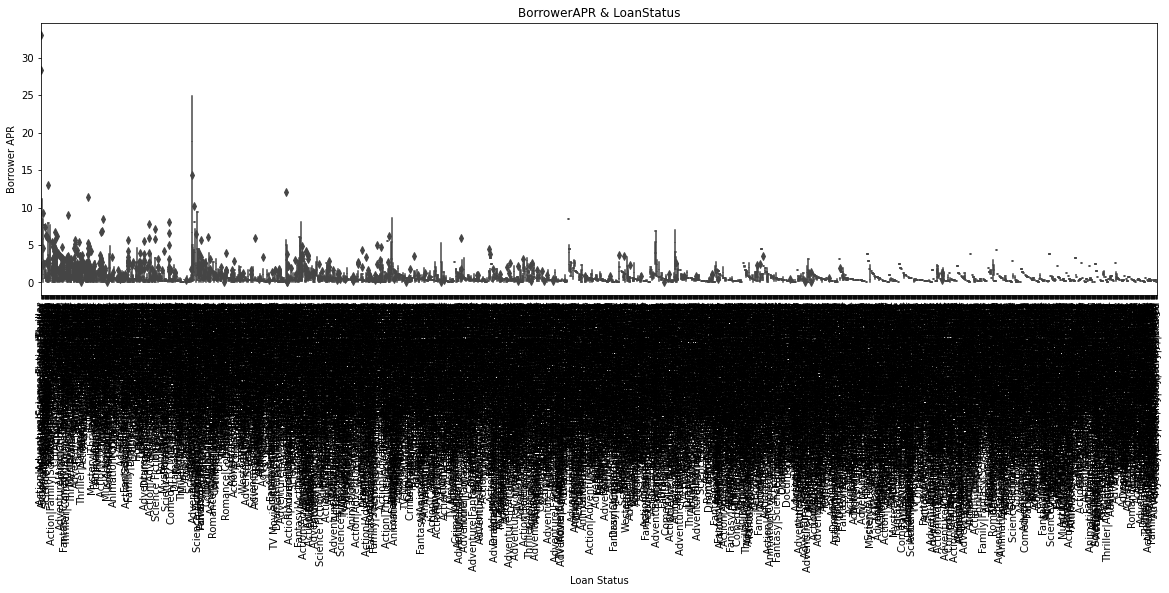

In [106]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [20, 5])
sns.boxplot(data=df2, y='popularity',x='genres');
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=90);

In [98]:
df2.groupby(['release_year', 'popularity'], as_index=False)['genres'];

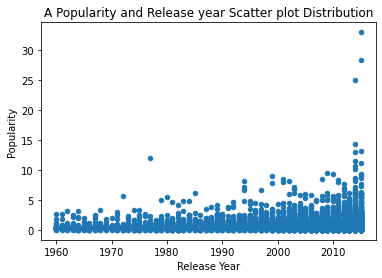

In [78]:
df2.plot(x="release_year", y='popularity', kind='scatter')
plt.title('A Popularity and Release year Scatter plot Distribution');
plt.xlabel('Release Year');
plt.ylabel('Popularity');
plt.show()

It looks like at the above diagram, as the year increases, the popularity as increases on the average

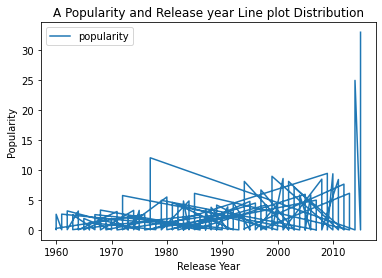

In [79]:
df2.plot(x="release_year", y='popularity')
plt.title('A Popularity and Release year Line plot Distribution');
plt.xlabel('Release Year');
plt.ylabel('Popularity');
plt.show()

### Conclusion
- As the year increases it's popularity also increase on the average

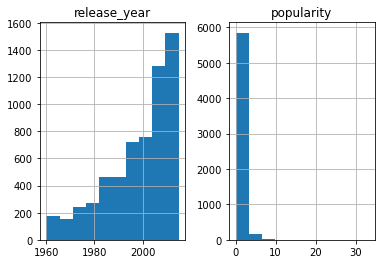

In [80]:
df2.groupby(['genres', 'release_year'], as_index=False)['popularity'].max().hist();

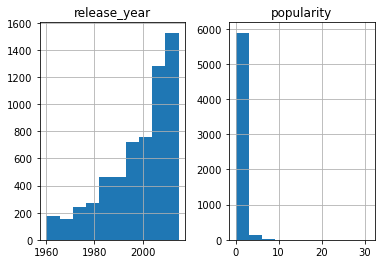

In [81]:
df2.groupby(['genres', 'release_year'], as_index=False)['popularity'].mean().hist();

- Checking if there's a relationship between the `release_year` and `popularity`

In [82]:
df2.groupby(['genres', 'release_year'], as_index=False)['revenue'].mean()

,genres,release_year,revenue
0,Action,1976,4.031989e+07
1,Action,1982,4.031989e+07
2,Action,1985,4.031989e+07
3,Action,1986,4.662137e+06
4,Action,1988,1.180612e+07
...,...,...,...
6044,Western|Drama|Crime|Romance,2013,1.031243e+06
6045,Western|History,1980,1.579519e+07
6046,Western|History|War,2004,2.581996e+07
6047,Western|Horror|Thriller,1999,4.031989e+07


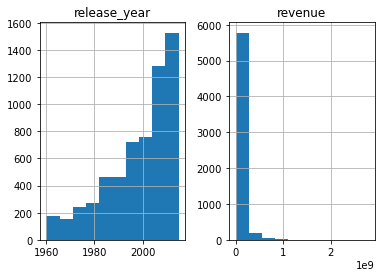

In [83]:
df2.groupby(['genres', 'release_year'], as_index=False)['revenue'].mean().hist();

- Checking if there's a relationship between a genres and release_year

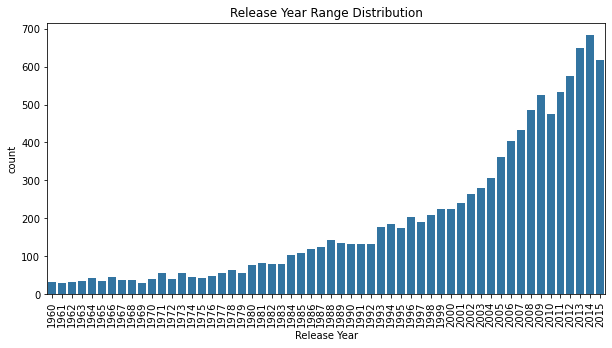

In [118]:
#Release Year Range Distribution
base_color = sns.color_palette()[0]
plt.figure(figsize=[10, 5])
sns.countplot(data=df2, x='release_year', color=base_color);
plt.xticks(rotation=90)
plt.xlabel('Release Year')
plt.title('Release Year Range Distribution');

- This means the highest Release Year for the movies was the year 2014 and as we can see from the visualization it increased starting in the 20th Century. 

### Research Question 3
### (Which movies had a lot of budget but ended up producing lower revenue. Does budget really affect the revenue?)

In [84]:
df2.budget.describe()

count    1.073100e+04
mean     2.249862e+07
std      2.814008e+07
min      1.000000e+00
25%      1.480365e+07
50%      1.480365e+07
75%      1.600000e+07
max      4.250000e+08
Name: budget, dtype: float64

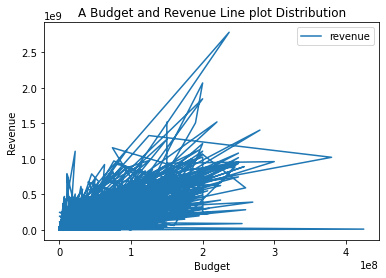

In [85]:
#Looking for any relationship between budget and revenue
df2.plot(x="budget", y='revenue')
plt.title('A Budget and Revenue Line plot Distribution');
plt.xlabel('Budget');
plt.ylabel('Revenue');
plt.show()

#Another way of checking the relationship between budget and revenue
#plt.plot(df2['budget'], df2['revenue']);
#plt.show()

In [86]:
df2[df2.budget == df2['budget'].max()]

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
46528,0.25054,425000000.0,11087569.0,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller,2010,425000000.0,11087569.0


In [87]:
df2.columns

Index(['popularity', 'budget', 'revenue', 'cast', 'director', 'genres',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [88]:
df2.revenue.describe()

count    1.073100e+04
mean     6.244304e+07
std      1.116267e+08
min      2.000000e+00
25%      4.024287e+07
50%      4.031989e+07
75%      4.031989e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [89]:
df2.groupby(['budget', 'budget_adj'], as_index=False)['revenue'].mean()

,budget,budget_adj,revenue
0,1.0,9.210911e-01,4.031989e+07
1,1.0,9.693980e-01,1.378000e+03
2,1.0,1.012787e+00,4.031989e+07
3,1.0,1.309053e+00,1.000000e+02
4,2.0,4.519285e+00,1.600000e+01
...,...,...,...
2598,270000000.0,2.920507e+08,3.910812e+08
2599,280000000.0,2.575999e+08,1.405036e+09
2600,300000000.0,3.155006e+08,9.610000e+08
2601,380000000.0,3.683713e+08,1.021683e+09


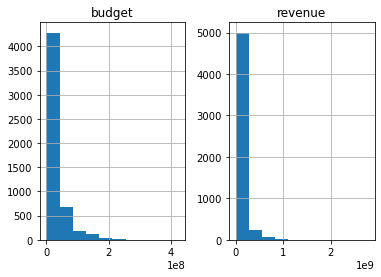

In [90]:
df2.groupby(['budget', 'genres'], as_index=False)['revenue'].mean().hist();

In [91]:
df2.head()

,popularity,budget,revenue,cast,director,genres,release_year,budget_adj,revenue_adj
id,,,,,,,,,
135397,32.985763,150000000.0,1.513529e+09,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000.0,3.784364e+08,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000.0,2.952382e+08,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000.0,2.068178e+09,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000.0,1.506249e+09,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2015,1.747999e+08,1.385749e+09


In [92]:
df3 = df2.copy()

In [93]:
df3_gen =df3[df3['genres'].str.contains('|')]
df3_gen.shape

(10731, 9)

In [94]:
df3_cast = df3[df3['cast'].str.contains('|')]
df3_cast.shape

(10731, 9)

The `cast` and the `genres` have a lot values with the `pipe(|)` so we are not going to separate it.

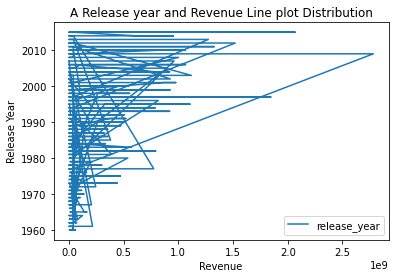

In [95]:
df2.plot(x="revenue", y='release_year')
plt.title('A Release year and Revenue Line plot Distribution');
plt.xlabel('Revenue');
plt.ylabel('Release Year');
plt.show()

> FROM

In [96]:
#df2.plot(x="budget", y=revenue["25th", "Median", "P75th"])
#plt.show()

In [97]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


### Limitations
- One of the limitation I encountered was finding the answer to the research question 2. The Genres were separated by pipe  `(|)` symbols. So it made the separation very difficult and I couldn't answer the research question 2 because I couldn't get a head way through. 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

### To conclude, I will say:
> 1. *AS THE YEAR INCREASES, THE POPULARITY INCREASES ALSO ON AVERAGE*
> 2.  *THE MOVIE WITH THE HIGHEST REVENUE HAVE A LOWER POPULARITY MEANING THAT `REVENUE` AND `POPULARITY` IS INVERSELY PROPORTIONAL*
> 3. *THAT BUDGET, AND BUDGET_ADJ HAVE A DIRECT IMPACT ON THE REVENUE*

In [108]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1